# Our Workflow
- Exploratory Data Analysis
- Data Preprocessing
- Develop the model
- Evaluate the model
- Select the best model

# EDA

Here's an illustration that depicts a cozy household setting with motion sensors installed in various rooms. This captures the essence of both single and multiple occupancy possibilities.

![title](Cozy_Household.png)

#### Step 1. Load the data

In [1]:
import sqlite3 # read database file
import pandas as pd # data processing
import numpy as np

con = sqlite3.connect("data.db")
# cur = con.cursor()

# Get the list of all tables in the database
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(tables_query, con)

df_homes = pd.read_sql_query("SELECT * FROM homes", con)
df_motion = pd.read_sql_query("SELECT * FROM motion", con)

con.close()

##### 1.1. Pandas display settings

In [2]:

# Setting pandas for proper display of results
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 5000)
pd.set_option('display.float_format', '{:20,.2f}'.format)
pd.set_option('display.max_colwidth', None)


##### 1.2. Dataset initial values

In [5]:
#Explore the data
(df_homes.head() ,df_motion.head(10))

(                                 id  multiple_occupancy
 0  dc922bd9bf8a2a9437642fe0dce9dcaa                   0
 1  d40fc88629271da7b5833ed3f3222d17                   1
 2  3fb064da180f02862063eca8e3b609c0                   1
 3  16d71b9c46d9abd765bf395818efe527                   0
 4  458264665736fd26184a8ea5641e6c48                   1,
                                  id                           home_id                datetime  location
 0  e41218b439d933a1cd9ad158f78e9198  205c42ec747e2db13cb92087a99433f1  2024-01-01 00:00:10+00    lounge
 1  92d48d869ae50b0764cfb8d70494f618  7d2f2e0a9e059b4fb8106bb0ad4b8a39  2024-01-01 00:00:17+00    lounge
 2  65c18ba64884442dd47c2fd4cf3630e4  44a880cc6fc3a7db3464092f650ae7f1  2024-01-01 00:00:18+00    lounge
 3  90d6336d189c929aa50fa08e5aee5f41  49b83fce41b676266b98cd1e095f1c11  2024-01-01 00:00:43+00    lounge
 4  6e3d73bed24b95ffdfe5ec017787f039  14328a0b7574e912c2e23d62c9476a07  2024-01-01 00:00:57+00    lounge
 5  122d8a75fd79a6b3fc3fb66

##### 1.3 Dataset Info

In [6]:
(df_homes.info(), df_motion.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  106 non-null    object
 1   multiple_occupancy  106 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580317 entries, 0 to 580316
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        580317 non-null  object
 1   home_id   580317 non-null  object
 2   datetime  580317 non-null  object
 3   location  580317 non-null  object
dtypes: object(4)
memory usage: 17.7+ MB


(None, None)

### Missing Values

##### 1.4. Check for Missing Values
- Purpose: Identify any missing or incomplete data in the motion sensor dataset.
- Implementation

In [7]:
missing_motion_values = df_motion.isnull().sum()
missing_motion_values

id          0
home_id     0
datetime    0
location    0
dtype: int64

In [8]:
missing_homes_values = df_homes.isnull().sum()
missing_homes_values

id                    0
multiple_occupancy    0
dtype: int64

##### 1.5. Summary Statistics
- Purpose: Get an overview of the data using summary statistics.
- Implementation:

In [9]:
motion_summary_statistics = df_motion.describe(include='all')
motion_summary_statistics

,id,home_id,datetime,location
count,580317,580317,580317,580317
unique,580317,50,502280,10
top,e41218b439d933a1cd9ad158f78e9198,3a1f53e2e242bff03301a250135f894b,2024-01-19 09:09:52+00,kitchen
freq,1,26472,6,158415


In [10]:
# non-null check
# isnull_homes = pd.isnull(df_homes['multiple_occupancy'])
# print(isnull_homes.count() == len(df_homes.index))


# isnull_motion = pd.isnull(df_motion['location'])
# print(isnull_motion.count() == len(df_motion.index))


homes_summary_statistics = df_motion.describe(include='all')
homes_summary_statistics


,id,home_id,datetime,location
count,580317,580317,580317,580317
unique,580317,50,502280,10
top,e41218b439d933a1cd9ad158f78e9198,3a1f53e2e242bff03301a250135f894b,2024-01-19 09:09:52+00,kitchen
freq,1,26472,6,158415


##### 1.6. Unique Values and Data Types
- Purpose: Review the unique values and data types for each column to ensure they align with expectations.
- Implementation:

In [11]:
unique_values = {col: df_motion[col].unique() for col in df_motion.columns}
data_types = df_motion.dtypes
unique_values



{'id': array(['e41218b439d933a1cd9ad158f78e9198',
        '92d48d869ae50b0764cfb8d70494f618',
        '65c18ba64884442dd47c2fd4cf3630e4', ...,
        '5168c52c3c022d747c81a6e6ce868e3f',
        '40cad449e7cef4164b02672e8caff379',
        '85cd6fe2cc3e585b17c4f7b9aaa4a439'], dtype=object),
 'home_id': array(['205c42ec747e2db13cb92087a99433f1',
        '7d2f2e0a9e059b4fb8106bb0ad4b8a39',
        '44a880cc6fc3a7db3464092f650ae7f1',
        '49b83fce41b676266b98cd1e095f1c11',
        '14328a0b7574e912c2e23d62c9476a07',
        '911f2a35cd30fb076d5f9c5544732585',
        '62c8145530aca30cb0455dc386c0a9d6',
        'e081c6aaaedac3d3678d3307388026fb',
        'b01397ea487498976a5b4ee93b173d4b',
        '20a3ebd4470c712d6f6d99908d931e09',
        'b2791887c7c0dca72cc0c9f921a976df',
        '352d5124d21e0cd52ea4124ada6391c6',
        '3a1f53e2e242bff03301a250135f894b',
        '7f7c3ffa2250e040da012e63d3e3f2c6',
        '424fc251603608ed5de614b11ce0c409',
        'a3b30fd4c2ba426cc01de5ce8adcd

In [12]:
unique_values_homes = {col: df_homes[col].unique() for col in df_homes.columns}
unique_values_homes


{'id': array(['dc922bd9bf8a2a9437642fe0dce9dcaa',
        'd40fc88629271da7b5833ed3f3222d17',
        '3fb064da180f02862063eca8e3b609c0',
        '16d71b9c46d9abd765bf395818efe527',
        '458264665736fd26184a8ea5641e6c48',
        '9a9ea4da5098513233b3cf91448e3035',
        '83740365903618c9bec6c786ce5643e9',
        'ed0c55b1c2dc6967ff7f3383aff9b206',
        '5a0c92dfe4c2c170fb754aacb571df80',
        'a3b30fd4c2ba426cc01de5ce8adcdcae',
        '4b729cf3d280b40ace1cc5aa6c4d7889',
        '9e0a435c04da7ee41b20bc029e15bc7c',
        '2a0ebed7a559cd8ccc74cc528d5f35f3',
        '95ae3b4c4fc060fdc0d73412210f355a',
        '20a3ebd4470c712d6f6d99908d931e09',
        '7eff3554b4c8dbe57386ac4eae7a06e8',
        '96e7dbfef588e8aa00d48acd199bfec9',
        'd50c2b0849510837b12e163c1e3f6849',
        'eb74060a7b6500f2281cb11732501b25',
        'bfd3f9c97f7e1320e9e6afbb34df9606',
        '2dee080963bd798b5ea19c33f91975b9',
        '37b99328702f9fdc68c431a4ac450f2e',
        '347660a8934cccd67


No standardization required as the data is fairly straightforward and standard.
I have applied Principal Component Analysis (PCA) method for dimentionality reduction.

### Step 2: Prepare and Merge the Data 

#### Datetime Processing and Derived Columns

##### 2.1. Convert datetime to Datetime Type
- Purpose: Convert the datetime column to a proper datetime format.
- Implementation

In [13]:
# Ensure datetime processing and adding of necessary columns
df_motion['datetime'] = pd.to_datetime(df_motion['datetime'])
df_motion['date'] = df_motion['datetime'].dt.date
df_motion['hour'] = df_motion['datetime'].dt.hour



- Datetime: Converting the datetime column to a proper datetime format.
- Date: Extracting the date allows grouping and aggregation based on individual days.
- Hour: The hour of the day when the motion was detected.


These columns are useful because human activity follows daily patterns, which can differ based on the number of occupants in the household.

##### 2.2. Distribution of Motion Events
- Purpose: Examine the distribution of motion events over time to identify any patterns or outliers.
- Implementation:

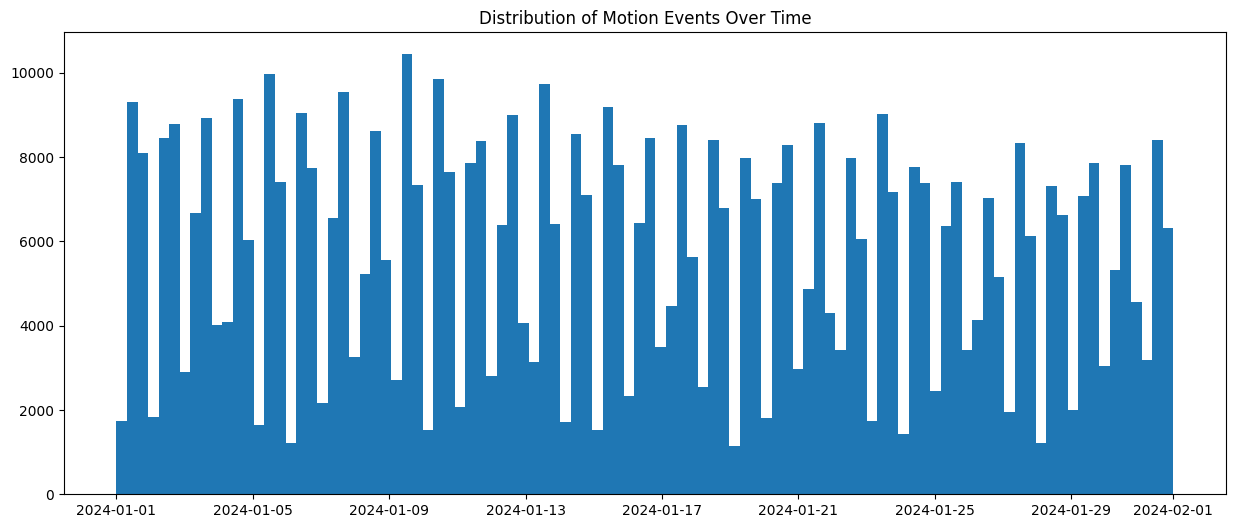

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.hist(df_motion['datetime'], bins=100)
plt.title('Distribution of Motion Events Over Time')
plt.show()


##### 2.3. Motion Events by Location
- Purpose: Understand the frequency of motion events across different locations.
- Implementation:


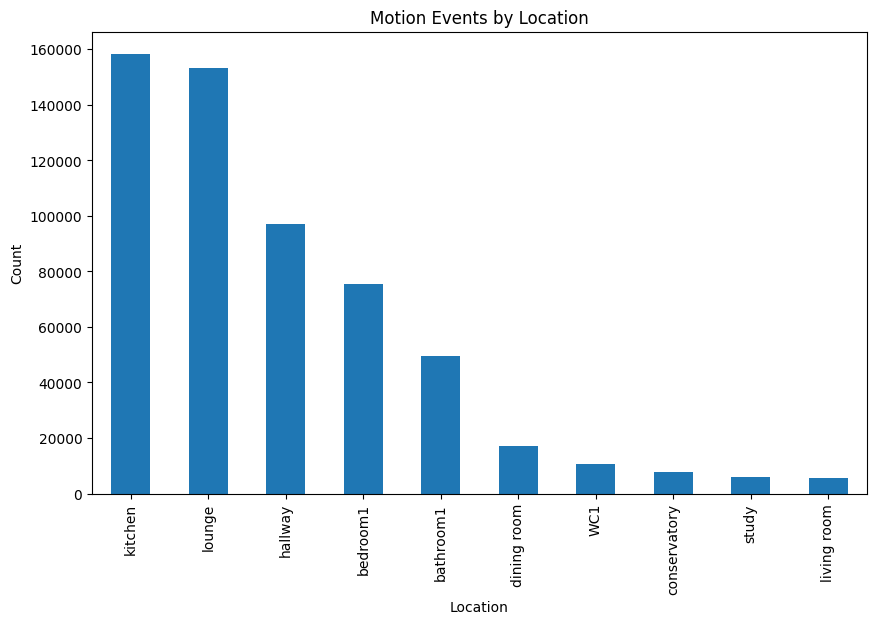

In [15]:
location_counts = df_motion['location'].value_counts()

plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar')
plt.title('Motion Events by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()


##### 2.4. Time of Day Analysis
- Purpose: Analyze when motion events typically occur during the day.
- Implementation:

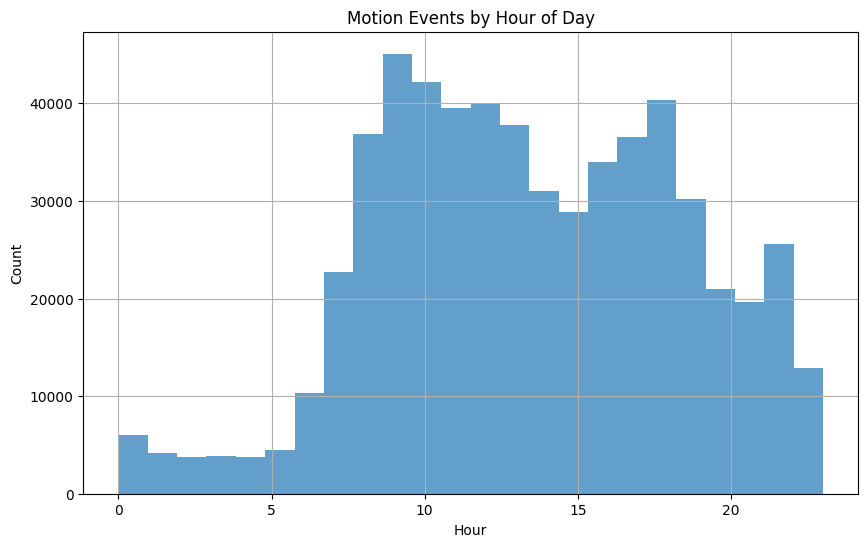

In [16]:
plt.figure(figsize=(10, 6))
df_motion['hour'].hist(bins=24, alpha=0.7)
plt.title('Motion Events by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()


### Feature Engineering
- Purpose: Add relevant features such as the hour of day, day of the week, and time differences.
- Implementation:

##### 2.2 Longest Consecutive Time Without Motion:
Here I wanted to understand the longest single period without motion in a home. This could indicate periods when no one is at home or longer inactive periods which might be characteristic of a single occupant household.

1. Calculate Time Differences:
- The first step is to calculate the time difference between consecutive motion events within each home.
- This is done using the `.diff()` function, which computes the difference between the timestamp of the current event and the previous event.

In [17]:
# Create features for the time between events
df_motion['time_diff'] = df_motion.sort_values('datetime').groupby(['home_id'])['datetime'].diff().dt.total_seconds() / 60 # converted to minutes

- Here, the dt.total_seconds() converts the time difference to seconds, and dividing by 60 converts it to minutes.

2. Group and Aggregate:
- Next, grouped the data by `home_id` and `date` to aggregate the time_diff values.
- Interested in the mean, maximum and minimum value for each day, which represents the longest period of inactivity during that day.

In [18]:
time_diff_features = df_motion.groupby(['home_id', 'date']).agg(
    average_consecutive_no_motion=('time_diff', 'mean'),
    # std_time_between_events=('time_diff', 'std'), # the correlation between this and avg_time was high so using one of them will be sufficient.
    longest_consecutive_no_motion=('time_diff', 'max'),
    minimum_consecutive_no_motion=('time_diff', 'min'),
).reset_index()


- This will give us a dataframe where each row corresponds to the maximum time gap (in minutes) between consecutive motion events for a given home on a given day.

##### Justification
The **Consecutive Time Without Motion** metric provides the maximum duration for which a home was inactive across all recorded days. This feature helps identify periods when a home might have been vacant or periods of extended inactivity, which are more characteristic of single occupant households. In contrast, households with multiple occupants may have fewer and shorter periods of inactivity due to the diverse schedules and activities of the occupants.



##### 2.3. Define Different Time of Day:

2.3.1. **Categorizing Time of Day:**
- Started by categorizing the time of day based on the hour at which the motion was detected.
- Used bins to categorize the hour into different periods (night, morning, afternoon, and evening).

- The `pd.cut()` function categorizes the hour into different periods of the day.
- Used four categories:
    - Night: 12:00 AM to 5:59 AM
    - Morning: 6:00 AM to 11:59 AM
    - Afternoon: 12:00 PM to 5:59 PM
    - Evening: 6:00 PM to 11:59 PM


In [19]:
# Count motions during specific periods of the day for each home
bins = [0, 6, 12, 18, 24]
labels = ['night', 'morning', 'afternoon', 'evening']
df_motion['time_of_day'] = pd.cut(df_motion['hour'], bins=bins, labels=labels, right=False)



2.3.2 Count Motions by Time of Day:
- The `pd.crosstab()` function cross-tabulates `home_id` and `date` with `time_of_day`, counting the motion events for each period.
- The resulting dataframe shows the count of motion events for each period for each home on each day.

In [20]:
motions_time_of_day = pd.crosstab([df_motion['home_id'], df_motion['date']], df_motion['time_of_day']).reset_index()

- The `pd.crosstab()` function computes a cross-tabulation of two factors: `home_id` and `time_of_day`.
- The resulting dataframe shows the count of motion events for each time of day for each home.
- Each row corresponds to a home, and each column corresponds to one of the time-of-day categories.

The resulting feature set contains the following columns:

1. home_id: The unique identifier for each home.
2. night: The count of motion events detected during the night (12:00 AM - 5:59 AM).
3. morning: The count of motion events detected during the morning (6:00 AM - 11:59 AM).
4. afternoon: The count of motion events detected during the afternoon (12:00 PM - 5:59 PM).
5. evening: The count of motion events detected during the evening (6:00 PM - 11:59 PM).

##### Justification
The **Motions by Time of Day** feature captures different activity patterns across various periods of the day, which can be indicative of different occupancy types:

1. Single Occupancy:
- May show less activity in the evening and at night, especially if the individual has a regular work schedule.
- May have more concentrated activity during specific times of the day.
2. Multiple Occupancy:
- Multiple people are likely to have varied schedules and therefore can show activity across all times of the day.
- May show more balanced activity throughout the day as different individuals might be active at different times.

##### 2.4. Weekend and Weekday Activity:

2.4.1. **Identify Weekend Days:**
- The first step is to identify whether each motion event occurred on a weekend (Saturday or Sunday).
- This was done using the `.dt.weekday` property of the datetime, which returns 5 for Saturday and 6 for Sunday.


In [21]:
df_motion['is_weekend'] = df_motion['datetime'].dt.weekday.isin([5, 6]).astype(int)

- The `.isin([5, 6])` checks if the weekday is either Saturday (5) or Sunday (6).
- The `.astype(int)` converts the boolean result to an integer (1 for weekend, 0 for weekday).

2.4.2. **Identify Weekday Days:**
- The first step is to identify whether each motion event occurred on a weekday (Monday, Tuesday, Wednesday, Thursday or Friday).
- This was done using the `.dt.weekday` property of the datetime, which returns 0 to 4 for for each weekday.


In [22]:
df_motion['is_weekday'] = df_motion['datetime'].dt.weekday.isin([0, 1, 2, 3, 4]).astype(int)

- The `.isin([0, 1, 2, 3, 4])` checks if the weekday is either Monday (0), Tuesday (1), Wednesday (2), Thursday (3) or Friday (4)
- The `.astype(int)` converts the boolean result to an integer (1 for weekend, 0 for weekday).

##### Justification
The Unique Locations feature provides insight into the spatial diversity of motion within a home, which can be an indicator of occupancy patterns:

1. **Single Occupancy:**
- Single occupant households might have less activity during weekends, especially if they have a predictable routine.
- Their weekend movement might be focused on specific activities or times of day.
2. **Multiple Occupancy:**
- Multiple occupant households are likely to have varied and frequent activity during weekends.
- Their weekend movement patterns might be more dispersed throughout the day and focused on different activities.

#### 2.5. Room Transitions:

2.5.1 **Identify Room Transitions:**
- The first step is to identify when a person moves from one room to another within the same home.
- Used the `shift()` function to get the previous room location for each event, grouped by home_id.

In [23]:
df_motion['previous_location'] = df_motion.groupby('home_id')['location'].shift(1)
df_motion['room_transition'] = (df_motion['location'] != df_motion['previous_location']).astype(int)

- Here, `shift(1)` shifts the values by one row, aligning the previous event's location for comparison.
- Then compared the current location with the previous location. If they are different, it means a transition has occurred, and recorded this with a `1` using `(df_motion['location'] != df_motion['previous_location']).astype(int)`.
- The result is a new column `room_transition` where `1` indicates a transition and `0` indicates no transition.

##### **Justification**
The `Room Transition Count` metric captures how actively individuals are moving between different rooms or areas within a home. This feature can help differentiate between single and multiple occupancy households based on their activity patterns:

1. **Single Occupancy:** 
- A single occupant might have fewer room transitions as they may stick to a routine or use fewer rooms.
2. **Multiple Occupancy:** 
- Multiple occupants might use more areas and move around more frequently, leading to a higher count of transitions.

##### 2.6. Peak Window:

2.6.1. Idenfity Peak Activity Window:
- Knowing the range of hours during which a household is most active can indicate different lifestyle patterns.
- Calculating the difference by finding the earliest and latest active hour on a given day.

In [24]:
peak_window = df_motion.groupby(['home_id', 'date']).agg(
    earliest_active_hour=('hour', 'min'),
    latest_active_hour=('hour', 'max')
).reset_index()
peak_window['peak_activity_window'] = peak_window['latest_active_hour'] - peak_window['earliest_active_hour']
peak_window_agg = peak_window.groupby(['home_id', 'date'])['peak_activity_window'].mean().reset_index(name='avg_peak_activity_window')


- Grouping by `home_id` and `date` to get max and min hours, then calculating the difference.
- Final result is getting stored as mean value for each home on each day. 

##### 2.7. Distinct Acitivity:

2.7.1. Identify Distict Days with Activity
- The number of consecutive days with motion activity can indicate routine patterns, which might differ between single and multiple occupancy households.
- Implemented it by counting the longest streak of consecutive days with recorded motion events.

In [25]:
distinct_days_with_activity = df_motion.groupby('home_id')['date'].nunique().reset_index(name='distinct_days_with_activity')

##### 2.8. Common and Private Areas:

2.8.1. Identify common and private areas:
- The balance of activity between common and private areas (e.g., living room vs. bedroom) might vary based on the number of occupants.
- Private areas are more likely to be used for personal activities or rest. 
- The use of private areas can indicate individual routines or solitary activities, which might be more characteristic of single occupancy households or provide insights into the private preferences of individuals within a multiple occupancy household.
- `Counting` the number of motion events or time spent in common and private areas.

In [26]:
common_areas = ['living_room', 'kitchen', 'dining_room', 'lounge', 'hallway', 'study']  # example list
private_areas = ['bedroom1', 'bathroom1', 'WC1']  # example list

df_motion['area_type'] = df_motion['location'].apply(lambda x: 'common' if x in common_areas else ('private' if x in private_areas else 'other'))
activity_by_area = df_motion.groupby(['home_id', 'date', 'area_type']).size().reset_index(name='activity_count')
activity_by_area_pivot = activity_by_area.pivot_table(
    index=['home_id', 'date'], 
    columns='area_type', 
    values='activity_count', 
    fill_value=0
).reset_index()

##### Justification for Private and Common Areas
1. Single Occupancy
- Private Areas:
    - Single occupants might spend more time in private areas due to individual routines or preferences.
    - They might have lower or more predictable activity levels in common areas.
- Common Areas:
    - Single occupants might use common areas primarily for essential or solitary activities.
    - They might have lower usage or restricted activity patterns in these areas.

2. Multiple Occupancy
- Private Areas:
    - Multiple occupants might have varied but significant use of private areas based on individual schedules or preferences.
    - They might have higher or less predictable activity levels in private areas.
- Common Areas:
    - Multiple occupants might engage in shared or social activities in common areas.
    - They might have higher usage or varied activity patterns in these areas.

##### 2.9. Daily Features Aggregations:

2.9.1. Identify Unique Locations:
- The code snippet below groups the data by `home_id` and `date`, then counts the unique locations for each group within each home on each day.
- This was achieved using the `.nunique()` function, which counts the number of unique elements.
- The resulting dataframe has one row for each home and day combination, with a column indicating how many unique locations had detected motion on that day.

2.9.2. Identify the Most Active Hour:
- Performed groupby on `home_id` and `date` to find out which hour of the day had the highest count of motion events for each home on each day.
- This was done using the `.value_counts()` method to count the occurrences of each hour and then finding the most frequent hour.
- The resulting dataframe has one row for each home and day combination, with a column indicating the hour when the most motion events occurred.

2.9.3. Identify Weekday and Weekend:
- Aggregated the weekend and weekday activity counts for each home over all recorded days.
- Then for finding pattern used computing the `sum` for each home.

2.9.4. Identify amounts_of_activity:
- The `amount_of_activity` feature measures the total time (in minutes) that motion was detected within a home on a given day. 
- This feature provides insight into the amount of activity or movement within a household, which can be indicative of the number of occupants or their daily routines.

2.9.5. Identify Room Transitions:
- The `Room Transition Count` feature measures how many times there was a transition between different rooms or areas within a home on a given day. 
- This feature can provide insights into the level of activity and movement within a household.
- Here, I used `.sum()` to calculate the total number of room transitions across all recorded days for each home.

In [27]:
# Aggregating daily features
daily_features = df_motion.groupby(['home_id', 'date']).agg(
    unique_locations=('location', 'nunique'),
    most_active_hour=('hour', lambda x: x.value_counts().idxmax()),
    weekend_activity=('is_weekend', 'sum'),
    weekday_activity=('is_weekday', 'sum'),
    amount_of_activity=('time_diff', 'sum'),
    room_transition_count=('room_transition', 'sum')
).reset_index()

##### 2.10. Location Activity:

2.10.1. Count Motion Events by Location:
- The first step is to count the number of motion events for each location within each home on each day.
- This was achieved using the .size() function, which counts the number of rows for each group.

In [28]:
locations_activity = df_motion.groupby(['location', 'home_id', 'date']).agg(
    locations_count = ('time_diff', 'sum')
).reset_index()


- The code snippet above groups the data by `location`, `home_id`, and `date`, then counts the number of motion events for each group.
- The resulting dataframe has one row for each unique combination of location, home, and day, with a column indicating the total count of motion events in that location on that day.

2.10.2. Pivot the Data:
- Next, we want to reshape the data so that each row corresponds to a home and each column corresponds to a location.
- This can be achieved using the `.pivot_table()` function.

In [29]:
pivot_locations_activity = locations_activity.pivot_table(
    index=['home_id', 'date'],
    columns='location',
    values='locations_count',
    fill_value=0
).reset_index() 
pivot_locations_activity = pivot_locations_activity.rename(columns={'WC1':'toilet', 'dining room':'dining_room', 'living room':'living_room'})


- The `.pivot_table()` function rearranges the dataframe, creating a table where:
    - Each row corresponds to home and date (index).
    - Each column corresponds to a unique location (columns).
- The cell values represent the count of motion events for each home-location pair (values).
- The fill_value=0 ensures that missing values (i.e., no motion detected in a location) are replaced with zero.
- Performing some column name cleanup for white space.

##### Justification
The Locations Activity feature provides insight into the spatial distribution of motion within a household, which can be an indicator of occupancy patterns:

1. Single Occupancy:
- Single occupant households might have fewer or less varied locations with detected motion, as they tend to use fewer rooms.
2. Multiple Occupancy:
- Multiple occupant households are likely to have more varied and frequent motion across different locations, as multiple people are using different areas within the house.


##### 2.11. Merge Features
Merging all the features here. Merning on either `home_id` only or on `home_id` and `date` based on how they were dervied.

In [30]:
feature_set = daily_features.reset_index(
).merge(
    pivot_locations_activity, on=['home_id', 'date'], how='left'
).merge(
    time_diff_features, on=['home_id', 'date'], how='left'
).merge(
    motions_time_of_day, on=['home_id', 'date'], how='left'
).merge(
    distinct_days_with_activity, on='home_id', how='left'
).merge(
    activity_by_area_pivot, on=['home_id', 'date'], how='left'
).merge(
    peak_window_agg, on=['home_id', 'date'], how='left')

feature_set = feature_set.fillna(0)
print(feature_set.info())
print(feature_set)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   index                          1465 non-null   int64  
 1   home_id                        1465 non-null   object 
 2   date                           1465 non-null   object 
 3   unique_locations               1465 non-null   int64  
 4   most_active_hour               1465 non-null   int32  
 5   weekend_activity               1465 non-null   int64  
 6   weekday_activity               1465 non-null   int64  
 7   amount_of_activity             1465 non-null   float64
 8   room_transition_count          1465 non-null   int64  
 9   toilet                         1465 non-null   float64
 10  bathroom1                      1465 non-null   float64
 11  bedroom1                       1465 non-null   float64
 12  conservatory                   1465 non-null   f

##### 2.12. Combining with Homes data

Finally combining with homes data to get `Multiple Occupancy` records. Also dropping any non-feature columns.

In [32]:
# Combine the feature set with the occupancy labels from homes table
combined_data = feature_set.merge(df_homes, left_on='home_id', right_on='id')
final_data = combined_data
final_data.info()

# Drop the redundant column from the homes table
combined_data.drop(columns=['id','home_id','index','date'], inplace=True)
combined_data.info()

combined_data.to_csv('dataset_to_predict.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   index                          1465 non-null   int64  
 1   home_id                        1465 non-null   object 
 2   date                           1465 non-null   object 
 3   unique_locations               1465 non-null   int64  
 4   most_active_hour               1465 non-null   int32  
 5   weekend_activity               1465 non-null   int64  
 6   weekday_activity               1465 non-null   int64  
 7   amount_of_activity             1465 non-null   float64
 8   room_transition_count          1465 non-null   int64  
 9   toilet                         1465 non-null   float64
 10  bathroom1                      1465 non-null   float64
 11  bedroom1                       1465 non-null   float64
 12  conservatory                   1465 non-null   f

### Step 3. Important Visualization

##### 3.1. Import matlotlib library

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##### 3.2. Correlation Matrix

<Axes: >

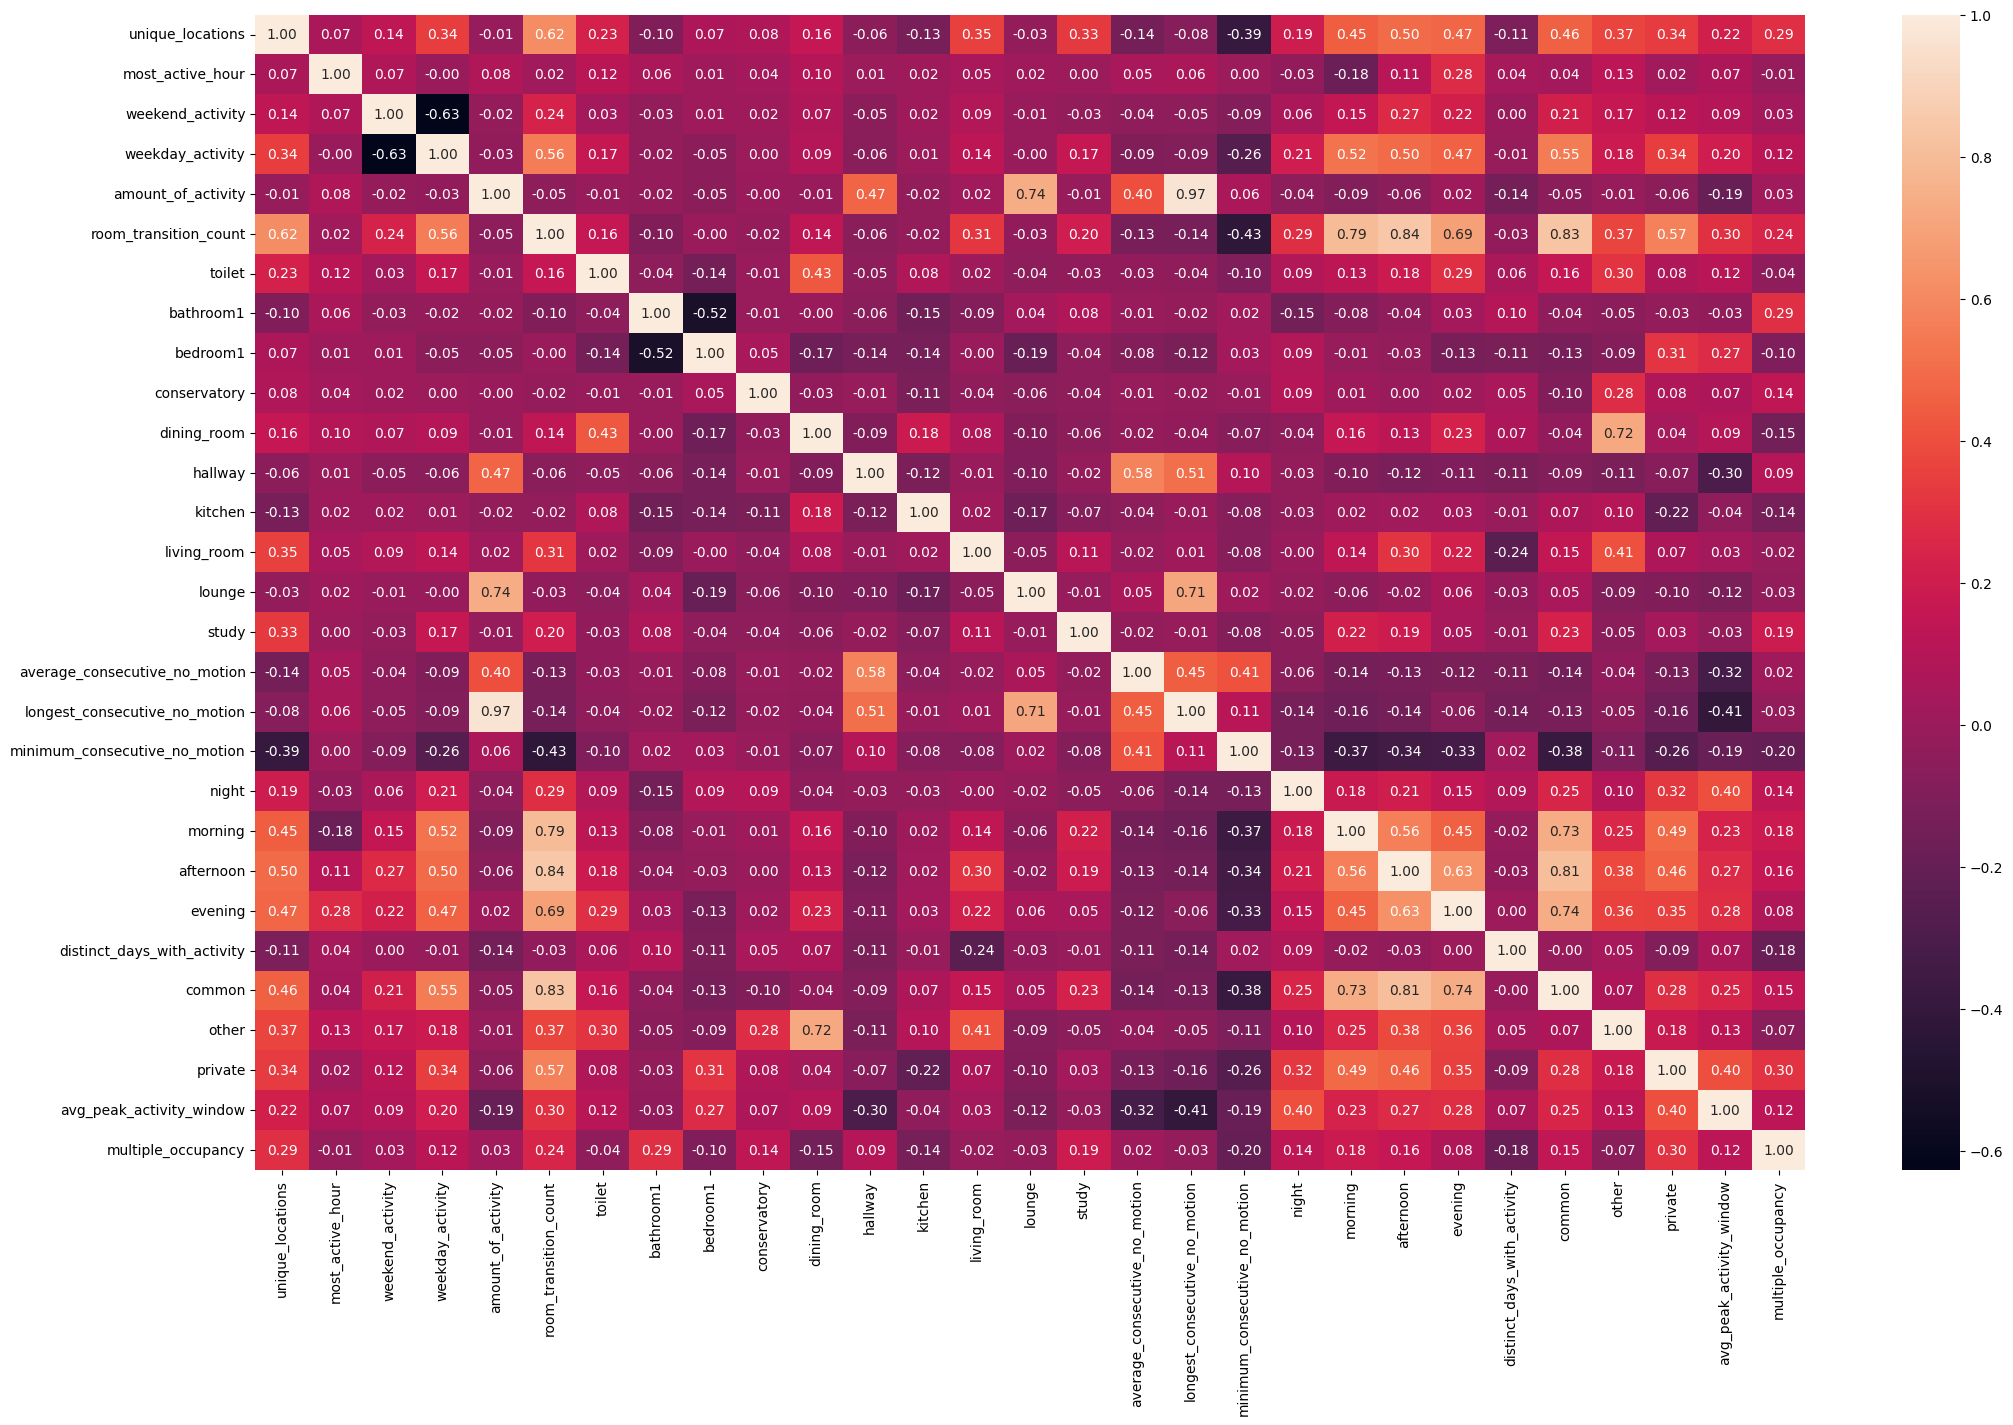

In [34]:
plt.figure(figsize = (25,15))
# sns.heatmap(combined_data.drop(columns=['index', 'home_id', 'date']).corr(),annot=True, fmt="1.2f")
sns.heatmap(combined_data.corr(),annot=True, fmt="1.2f")

##### 3.3. Check Events Distribution

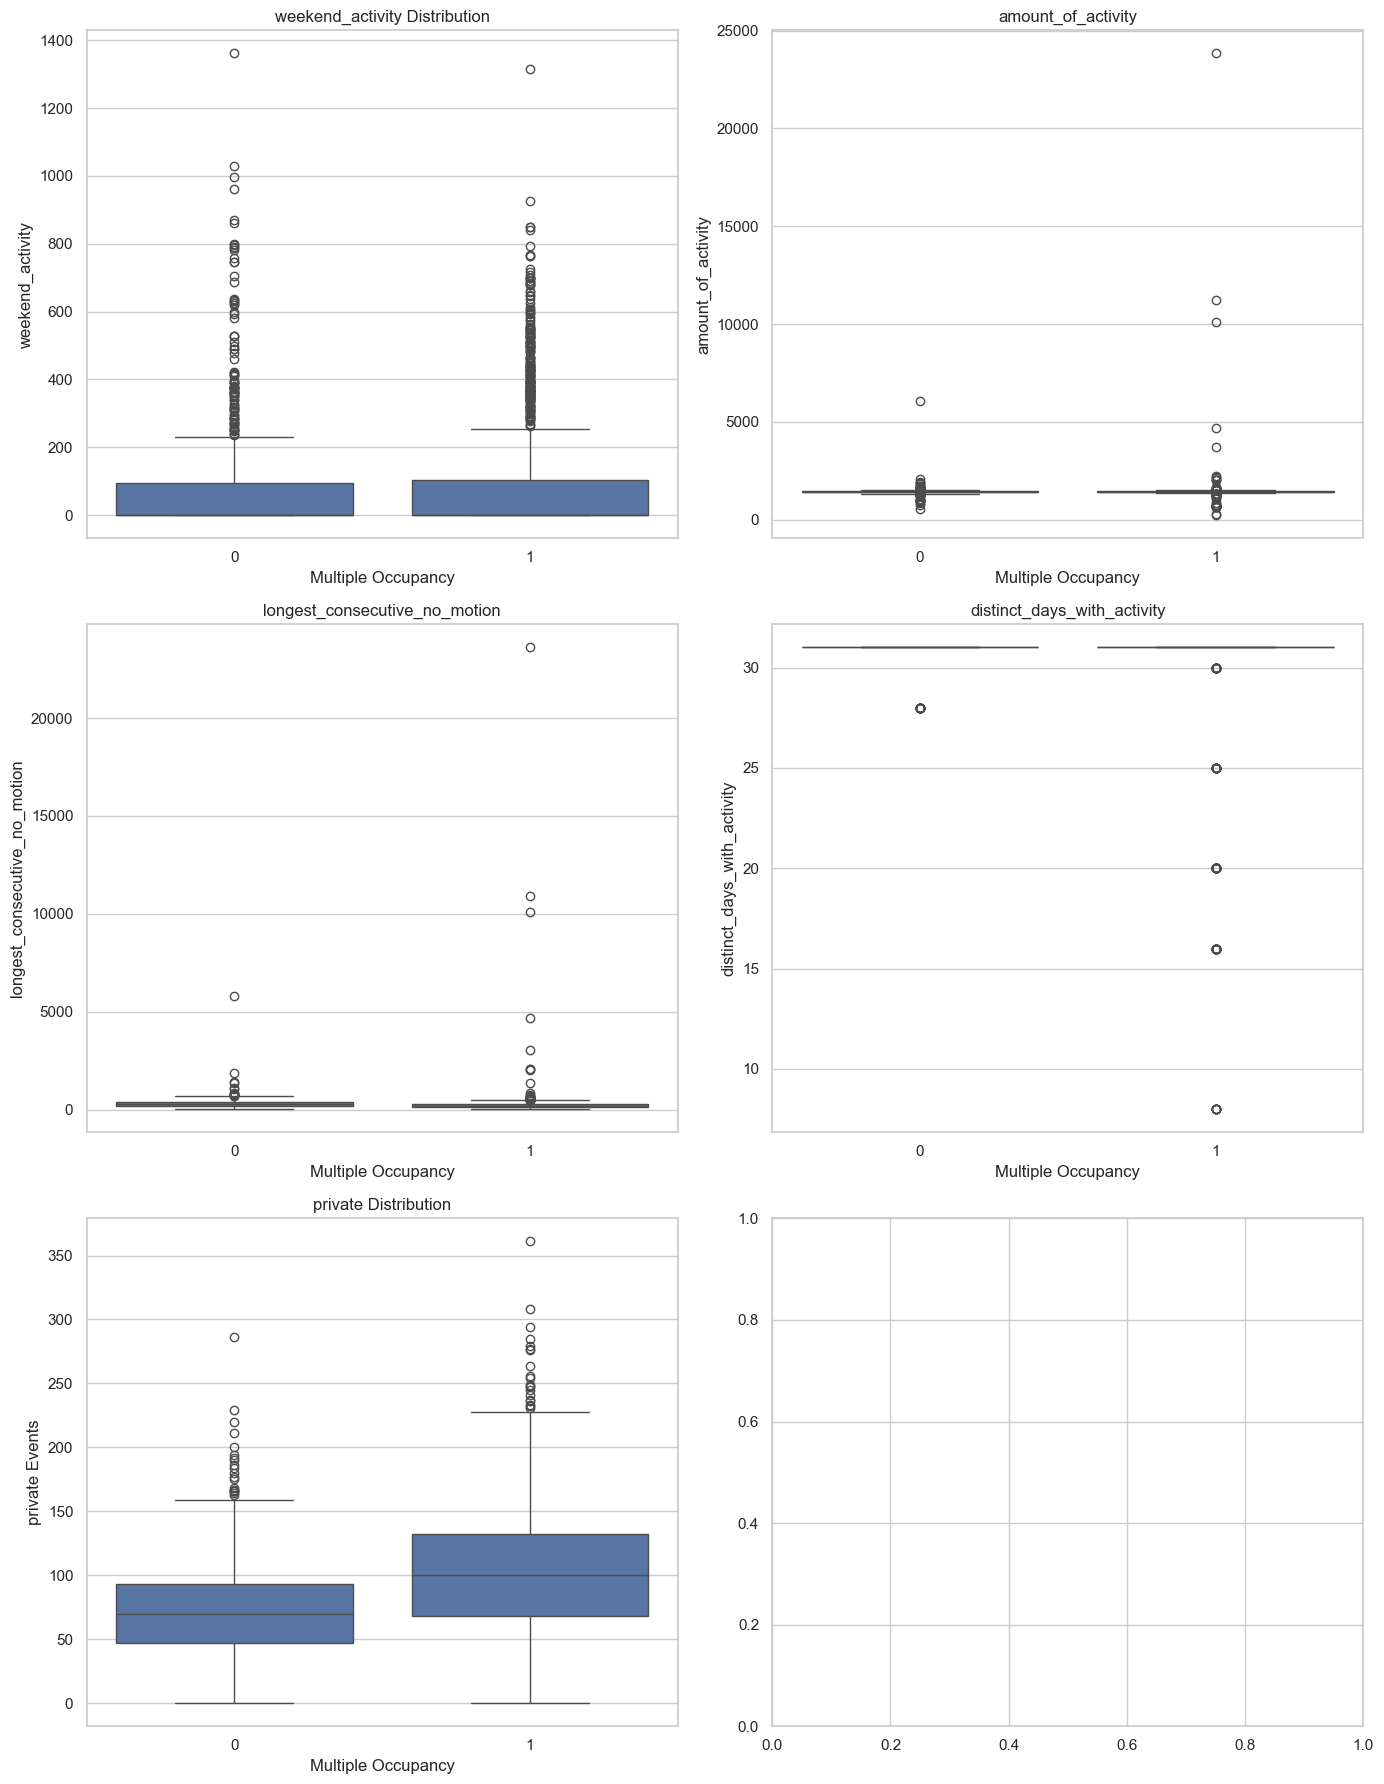

In [35]:
# Set the style for seaborn plots
sns.set_theme(style="whitegrid")

# Prepare a figure with multiple subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 18))
axes = axes.flatten()

# Plot total_events distribution
sns.boxplot(ax=axes[0], x='multiple_occupancy', y='weekend_activity', data=combined_data)
axes[0].set_title('weekend_activity Distribution')
axes[0].set_xlabel('Multiple Occupancy')
axes[0].set_ylabel('weekend_activity')

# Plot unique_locations distribution
sns.boxplot(ax=axes[1], x='multiple_occupancy', y='amount_of_activity', data=combined_data)
axes[1].set_title('amount_of_activity')
axes[1].set_xlabel('Multiple Occupancy')
axes[1].set_ylabel('amount_of_activity')

# Plot active_hours_range distribution
sns.boxplot(ax=axes[2], x='multiple_occupancy', y='longest_consecutive_no_motion', data=combined_data)
axes[2].set_title('longest_consecutive_no_motion')
axes[2].set_xlabel('Multiple Occupancy')
axes[2].set_ylabel('longest_consecutive_no_motion')

# Plot daily_events_mean distribution
sns.boxplot(ax=axes[3], x='multiple_occupancy', y='distinct_days_with_activity', data=combined_data)
axes[3].set_title('distinct_days_with_activity')
axes[3].set_xlabel('Multiple Occupancy')
axes[3].set_ylabel('distinct_days_with_activity')

# Plot daily_events_std distribution
sns.boxplot(ax=axes[4], x='multiple_occupancy', y='private', data=combined_data)
axes[4].set_title('private Distribution')
axes[4].set_xlabel('Multiple Occupancy')
axes[4].set_ylabel('private Events')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


##### 3.4 Scatter Plot for consecutive no motion
Here we can easily see for single occupancy there less event without motion compared to multiple occupancy.

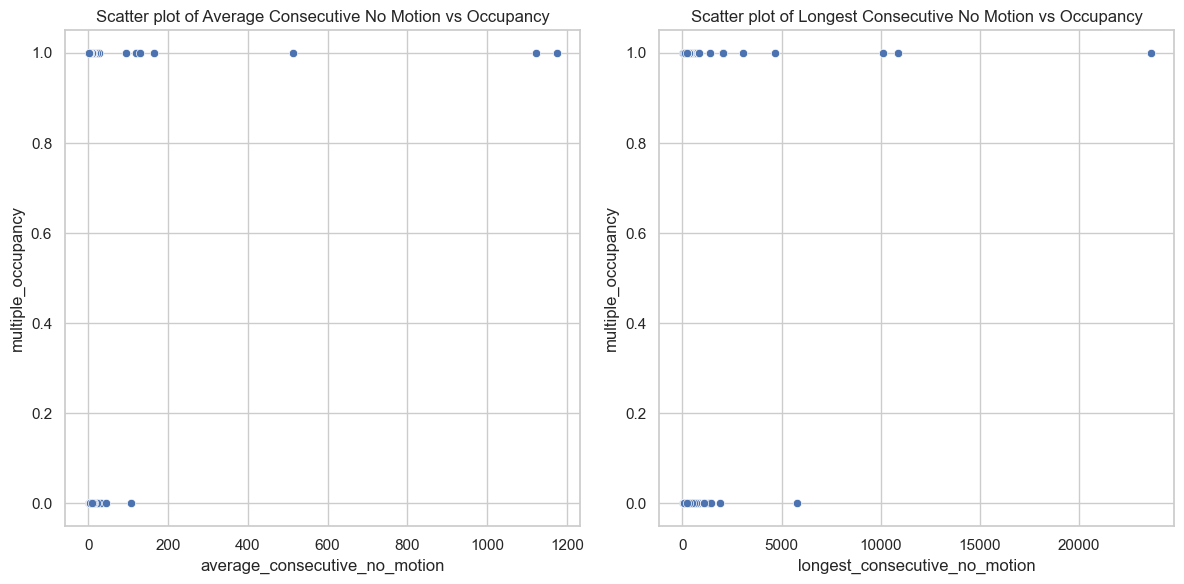

In [36]:
# Scatter plot for two example features against the target

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=combined_data.drop(columns=['multiple_occupancy'])['average_consecutive_no_motion'], y=combined_data['multiple_occupancy'])
plt.title('Scatter plot of Average Consecutive No Motion vs Occupancy')

plt.subplot(1, 2, 2)
sns.scatterplot(x=combined_data.drop(columns=['multiple_occupancy'])['longest_consecutive_no_motion'], y=combined_data['multiple_occupancy'])
plt.title('Scatter plot of Longest Consecutive No Motion vs Occupancy')

plt.tight_layout()
plt.show()


### Step 4. Model Building and Training

In [37]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
import time

# Prepare feature matrix and labels
X = combined_data.drop(columns=['multiple_occupancy'])
y = combined_data['multiple_occupancy']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



##### 4.1. Training Logistic Regression, KNN and LightBGM models

The table and charts above show the evaluation metrics for both the Logistic Regression, K-Nearest Neighbors models and LightBGM. The metrics we looked at are:

- **Accuracy:** Measures the proportion of correct predictions.
- **Precision:** Measures the proportion of true positive predictions among the positive predictions made by the model.
- **Recall:** Measures the proportion of true positive predictions among the actual positive cases.
- **F1 Score:** The harmonic mean of precision and recall, useful for assessing the balance between the two.
- **AUC:** Measures the area under the ROC curve, providing insight into the trade-off between true positive and false positive rates.
- **Training Time:** The time taken to train the model, important for efficiency considerations.

In [38]:

def evaluate_model(model, X_train, X_test, y_train, y_test):
    start_time = time.time()
    
    # Fit the model to the preprocessed training data
    model.fit(X_train, y_train)

    # Time taken to train
    training_time = time.time() - start_time
    
    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate the Precision
    precision = precision_score(y_test, y_pred)

    # Calculate the Recall Score
    recall = recall_score(y_test, y_pred)

    # Calculate the F1 Score
    f1 = f1_score(y_test, y_pred)

    # Measures the area under the ROC curve
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    metrics = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "auc": auc,
        "training_time": training_time
    }

    return metrics, y_pred


# Evaluate Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg_metrics, logreg_pred = evaluate_model(logreg, X_train, X_test, y_train, y_test)

# Evaluate K-Nearest Neighbors
knn = KNeighborsClassifier()
knn_metrics, knn_pred = evaluate_model(knn, X_train, X_test, y_train, y_test)

# Evaluate LightGBM
lgbm = LGBMClassifier()
lgbm_metrics, lgbm_pred = evaluate_model(lgbm, X_train, X_test, y_train, y_test)

# Create DataFrame with the results
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC', 'Training Time'],
    'Logistic Regression': [logreg_metrics['accuracy'], logreg_metrics['precision'], logreg_metrics['recall'], logreg_metrics['f1'], logreg_metrics['auc'], logreg_metrics['training_time']],
    'K-Nearest Neighbors': [knn_metrics['accuracy'], knn_metrics['precision'], knn_metrics['recall'], knn_metrics['f1'], knn_metrics['auc'], knn_metrics['training_time']],
    'LightGBM': [lgbm_metrics['accuracy'], lgbm_metrics['precision'], lgbm_metrics['recall'], lgbm_metrics['f1'], lgbm_metrics['auc'], lgbm_metrics['training_time']]
})

results


/Users/tabassumtahera/CV/New/ICL/Test/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 736, number of negative: 436
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001644 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4241
[LightGBM] [Info] Number of data points in the train set: 1172, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.627986 -> initscore=0.523588
[LightGBM] [Info] Start training from score 0.523588


,Metric,Logistic Regression,K-Nearest Neighbors,LightGBM
0,Accuracy,0.81,0.92,0.99
1,Precision,0.81,0.93,0.98
2,Recall,0.90,0.94,0.99
3,F1 Score,0.85,0.94,0.99
4,AUC,0.91,0.97,1.00
5,Training Time,0.52,0.00,0.80


Given the metrics, LightGBM offers the best overall performance across all categories, making it an excellent choice for predicting household occupancy based on motion sensor data.

##### 4.1.1. Feature Scaling

Feature scaling standardizes or normalizes features to ensure that they contribute equally to the model's performance. It's crucial for distance-based algorithms, gradient descent optimization, and feature importance evaluations.

In [49]:
from sklearn.preprocessing import StandardScaler

# Sample data
# Assuming 'final_data' DataFrame is available with the features and target column

# Prepare the feature matrix and labels
X = final_data.drop(columns=['multiple_occupancy'])
y = final_data['multiple_occupancy']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to evaluate the models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "auc": auc,
        "training_time": training_time
    }, y_pred

# Evaluate Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg_metrics, logreg_pred = evaluate_model(logreg, X_train_scaled, X_test_scaled, y_train, y_test)

# Evaluate K-Nearest Neighbors
knn = KNeighborsClassifier()
knn_metrics, knn_pred = evaluate_model(knn, X_train_scaled, X_test_scaled, y_train, y_test)

# Evaluate LightGBM (without scaling)
lgbm = LGBMClassifier()
lgbm_metrics, lgbm_pred = evaluate_model(lgbm, X_train, X_test, y_train, y_test)

# Create DataFrame with the results
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC', 'Training Time'],
    'Logistic Regression': [logreg_metrics['accuracy'], logreg_metrics['precision'], logreg_metrics['recall'], logreg_metrics['f1'], logreg_metrics['auc'], logreg_metrics['training_time']],
    'K-Nearest Neighbors': [knn_metrics['accuracy'], knn_metrics['precision'], knn_metrics['recall'], knn_metrics['f1'], knn_metrics['auc'], knn_metrics['training_time']],
    'LightGBM': [lgbm_metrics['accuracy'], lgbm_metrics['precision'], lgbm_metrics['recall'], lgbm_metrics['f1'], lgbm_metrics['auc'], lgbm_metrics['training_time']]
})


results


[LightGBM] [Info] Number of positive: 736, number of negative: 436
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001257 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4241
[LightGBM] [Info] Number of data points in the train set: 1172, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.627986 -> initscore=0.523588
[LightGBM] [Info] Start training from score 0.523588


,Metric,Logistic Regression,K-Nearest Neighbors,LightGBM
0,Accuracy,0.82,0.93,0.99
1,Precision,0.81,0.93,0.98
2,Recall,0.90,0.95,0.99
3,F1 Score,0.85,0.94,0.99
4,AUC,0.91,0.98,1.00
5,Training Time,0.02,0.00,0.64


This code snippet demonstrates how to perform feature scaling for models like Logistic Regression and K-Nearest Neighbors, which benefit from scaling, while also evaluating LightGBM, which typically doesn't require scaling due to its tree-based nature, thus it did not see any improvement unlike other two models.


##### 4.2. K-Fold Cross-Validation with Scaling


In [44]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer



# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'LightGBM': LGBMClassifier()
}

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

# Evaluate each model
cv_results = {}

for model_name, model in models.items():
    results = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='accuracy')
    cv_results[model_name] = {
        'Accuracy': np.mean(cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='accuracy')),
        'Precision': np.mean(cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='precision')),
        'Recall': np.mean(cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='recall')),
        'F1 Score': np.mean(cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='f1')),
        'AUC': np.mean(cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='roc_auc'))
    }

# Convert to DataFrame
cv_results_df = pd.DataFrame(cv_results).T
cv_results_df


[LightGBM] [Info] Number of positive: 590, number of negative: 347
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4056
[LightGBM] [Info] Number of data points in the train set: 937, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.629669 -> initscore=0.530798
[LightGBM] [Info] Start training from score 0.530798
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 581, number of negative: 356
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000701 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4060
[LightGBM] [Info] Number of data poin

,Accuracy,Precision,Recall,F1 Score,AUC
Logistic Regression,0.83,0.86,0.87,0.86,0.91
K-Nearest Neighbors,0.92,0.92,0.95,0.93,0.97
LightGBM,0.98,0.98,0.99,0.98,1.00


##### Benefits of K-Fold Cross-Validation
K-Fold Cross-Validation is a robust method for evaluating the performance of machine learning models, offering several key benefits:

1. Reduces Overfitting
- By using multiple train-test splits, K-Fold Cross-Validation helps mitigate the risk of overfitting the model to a single train-test split.
2. Provides a More Reliable Estimate of Model Performance
- By averaging the performance across multiple folds, K-Fold Cross-Validation offers a robust measure of model accuracy, precision, recall, or any other metric of interest.
3. Uses All Data for Training and Testing
- In 
𝑘
k-fold cross-validation, each data point is used for testing exactly once and for training 
𝑘
−
1
k−1 times, which maximizes the use of available data.
4. Helps Detect Variance in Model Performance
- If the model performs well on some folds but poorly on others, it may indicate issues like overfitting or data distribution problems, which can be addressed through further tuning or feature engineering.



##### 4.3. Feature Distribution

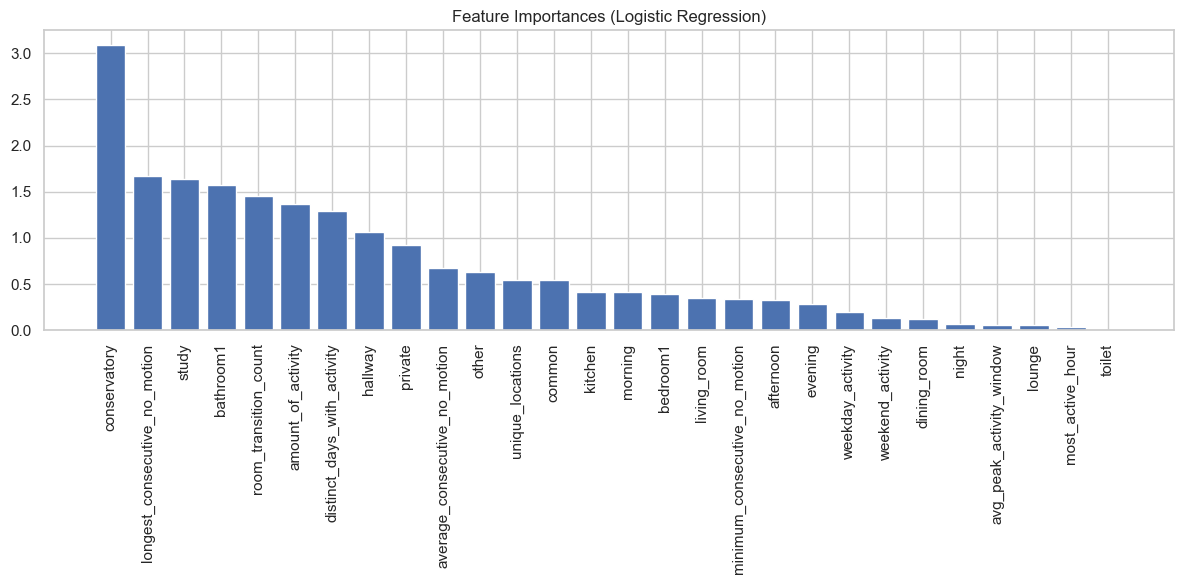

In [45]:

# Feature importance from Logistic Regression (absolute coefficients)
coefficients = np.abs(logreg.coef_[0])
indices = np.argsort(coefficients)[::-1]
features = X.columns

plt.figure(figsize=(12, 6))
plt.title("Feature Importances (Logistic Regression)")
plt.bar(range(X.shape[1]), coefficients[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


##### 4.4. Model Evaluation

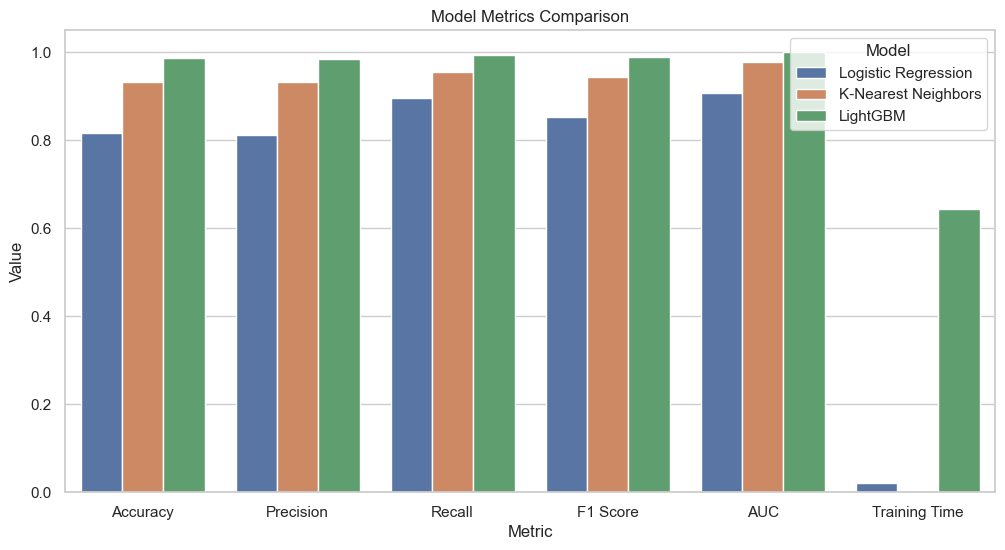

In [51]:

# Transpose the results for easier plotting
results_transposed = results.set_index('Metric').T.reset_index()
results_transposed.rename(columns={'index': 'Model'}, inplace=True)
results_melted = pd.melt(results_transposed, id_vars=['Model'], var_name='Metric', value_name='Value')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Value', hue='Model', data=results_melted)
plt.title("Model Metrics Comparison")
plt.show()


##### 4.5. Confusion Matrix

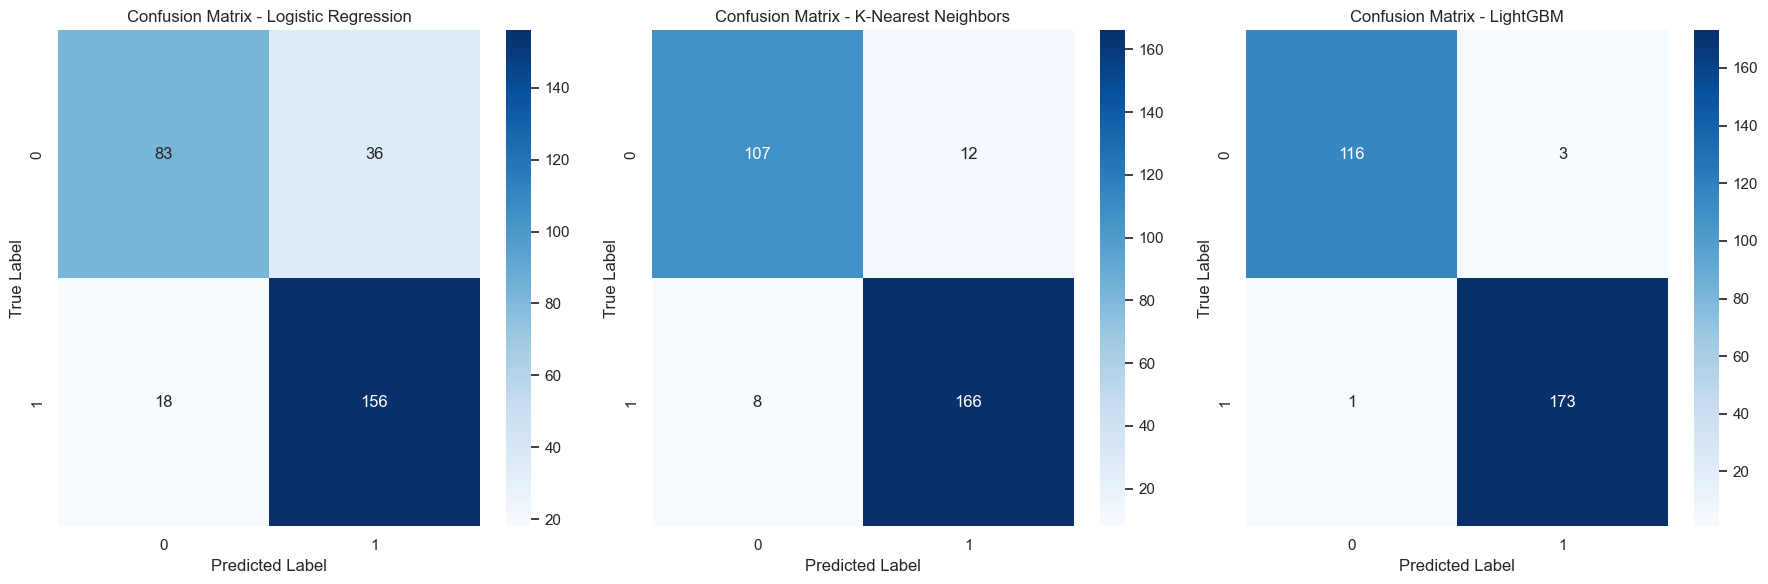

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix charts
models = {
    'Logistic Regression': logreg_pred,
    'K-Nearest Neighbors': knn_pred,
    'LightGBM': lgbm_pred
}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (model_name, y_pred) in enumerate(models.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", ax=axes[i], cmap='Blues')
    axes[i].set_title(f'Confusion Matrix - {model_name}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

plt.tight_layout()
plt.show()


1. True Negative (TN):
- Definition: The number of correctly predicted negative instances.
- Interpretation: The model correctly predicted the negative class.
- Example: In a medical test scenario where the goal is to detect a disease, TN would indicate the number of healthy people correctly identified as not having the disease.
2. False Positive (FP):
- Definition: The number of incorrectly predicted positive instances.
- Interpretation: The model incorrectly predicted the positive class.
- Example: In the same medical test scenario, FP would indicate the number of healthy people incorrectly identified as having the disease (also known as a "Type I error").
3. False Negative (FN):
- Definition: The number of incorrectly predicted negative instances.
- Interpretation: The model incorrectly predicted the negative class.
- Example: In the medical test scenario, FN would indicate the number of sick people incorrectly identified as healthy (also known as a "Type II error").
4. True Positive (TP):
- Definition: The number of correctly predicted positive instances.
- Interpretation: The model correctly predicted the positive class.
- Example: In the medical test scenario, TP would indicate the number of sick people correctly identified as having the disease.

##### 4.6. PyCaret Model Comparison

In [53]:
from pycaret.classification import *
experiment = setup(combined_data, target='multiple_occupancy', session_id=1)

,Description,Value
0,Session id,1
1,Target,multiple_occupancy
2,Target type,Binary
3,Original data shape,"(1465, 29)"
4,Transformed data shape,"(1465, 29)"
5,Transformed train set shape,"(1025, 29)"
6,Transformed test set shape,"(440, 29)"
7,Numeric features,28
8,Preprocess,True
9,Imputation type,simple


In [54]:
compare_models()

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [ ]:
et = create_model('lightgbm')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:44:32
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9709,0.9984,0.9844,0.9692,0.9767,0.9378,0.9380
1,0.9903,1.0000,0.9844,1.0000,0.9921,0.9795,0.9797
2,0.9320,0.9900,0.9531,0.9385,0.9457,0.8548,0.8550
3,0.9612,0.9960,0.9844,0.9545,0.9692,0.9166,0.9174
4,0.9612,0.9960,1.0000,0.9412,0.9697,0.9158,0.9190
5,0.9706,1.0000,1.0000,0.9552,0.9771,0.9361,0.9380
6,0.9804,0.9975,1.0000,0.9697,0.9846,0.9576,0.9585
7,0.9706,0.9976,0.9841,0.9688,0.9764,0.9374,0.9376
8,0.9902,0.9959,0.9841,1.0000,0.9920,0.9793,0.9796


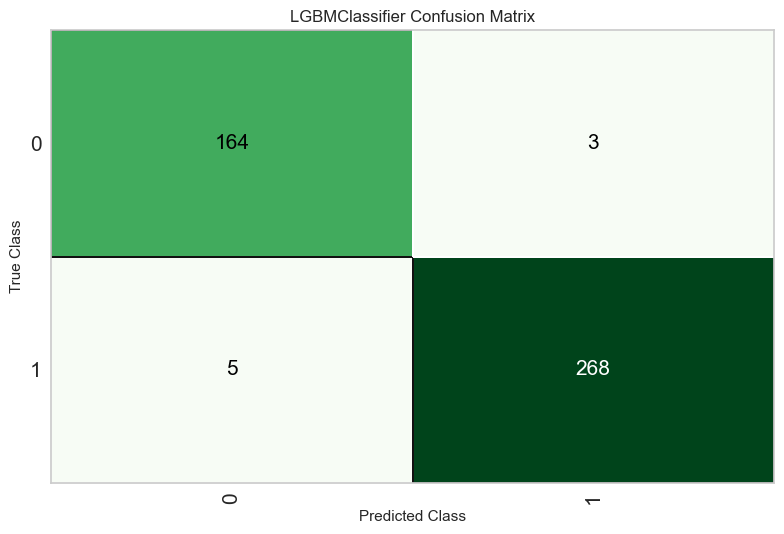

In [ ]:
plot_model(et,'confusion_matrix')


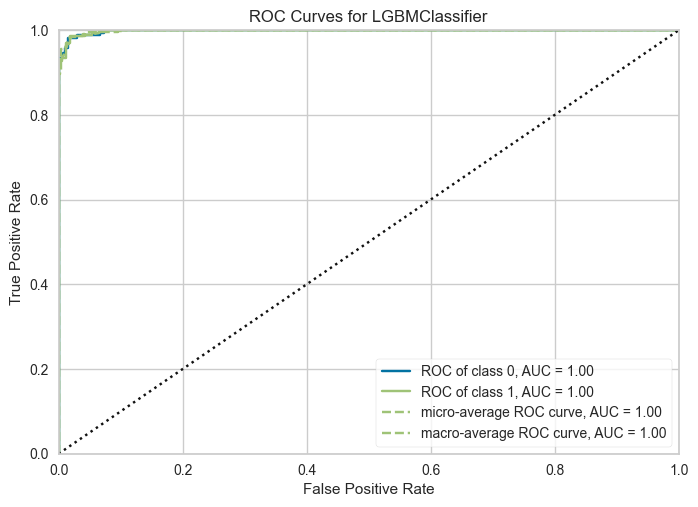

In [ ]:
plot_model(et,'auc')


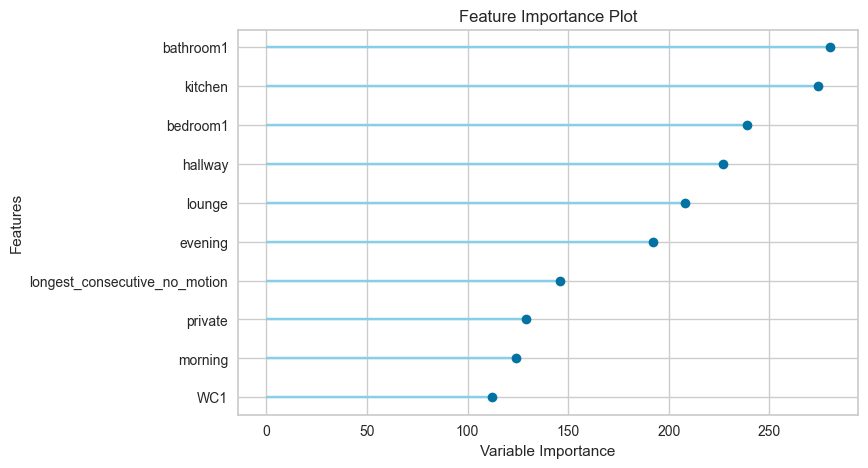

In [ ]:
plot_model(et,'feature')


### Step 5. Final Model Selection

In [55]:
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming 'X' and 'y' are already defined (feature matrix and labels)
# Initialize LightGBM
lgbm = LGBMClassifier()

# Initialize K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

# Perform cross-validation for each metric
results = {metric: cross_val_score(lgbm, X, y, cv=kf, scoring=scorer).mean() for metric, scorer in scoring.items()}

# Display the results
cv_results_df = pd.DataFrame([results], index=['LightGBM'])
cv_results_df


[LightGBM] [Info] Number of positive: 736, number of negative: 436
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002807 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4241
[LightGBM] [Info] Number of data points in the train set: 1172, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.627986 -> initscore=0.523588
[LightGBM] [Info] Start training from score 0.523588
[LightGBM] [Info] Number of positive: 743, number of negative: 429
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000612 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4292
[LightGBM] [Info] Number of data points in the train set: 1172, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.633959 -> initscore=0.549239
[LightGBM] [Inf

,accuracy,precision,recall,f1,roc_auc
LightGBM,0.98,0.98,0.99,0.98,0.98


##### 5.1.4. Save the Model

In [56]:
import joblib

# Save the model
joblib.dump(lgbm, 'lightgbm_model.pkl')

# Load the model
# loaded_model = joblib.load('lightgbm_model.pkl')


['lightgbm_model.pkl']

In [ ]:
import onnx
import skl2onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# Predict using the trained model
def predict_single_or_multiple_occupancy(unique_sensors, total_activations, average_time_between):
    input_data = np.array([[unique_sensors, total_activations, average_time_between]])
    input_data_scaled = scaler.transform(input_data)
    return model.predict(input_data_scaled)[0]

# Test prediction
test_prediction = predict_single_or_multiple_occupancy(5, 50, 100)
test_prediction

# Convert to ONNX format
initial_type = [('float_input', FloatTensorType([None, 3]))]
onnx_model = convert_sklearn(model, initial_types=initial_type)
with open("lightGBM.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())


/Users/tabassumtahera/CV/New/ICL/Test/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 3 features, but StandardScaler is expecting 28 features as input.

##### Web Application Use Cases for Household Occupancy Prediction



##### 1. Elderly Care
**Objective:** Monitor the well-being of elderly or vulnerable individuals.

- Functionality: The app can track occupancy patterns and detect anomalies that might indicate a problem.
- Example: If an elderly person’s usual patterns change drastically, the app can alert caregivers or family members to check in on them.

##### 2. Smart Home Automation
**Objective:** Automatically adjust home settings based on occupancy.

- Functionality: The app can control lighting, heating, air conditioning, and security systems based on occupancy predictions.
- Example: If the house is predicted to be empty, the app can turn off lights, reduce heating, and arm the security system. When occupants return, the app can adjust the settings to their preferences.

##### 3. Energy Management
**Objective:** Optimize energy usage based on occupancy.

- Functionality: The app can predict when the house is likely to be empty and adjust energy-consuming devices accordingly.
- Example: The app can reduce heating or cooling when the house is empty, helping to save energy and reduce utility bills.

##### 4. Home Security
**Objective:** Enhance home security based on occupancy patterns.

- Functionality: The app can detect unusual occupancy patterns and alert homeowners or authorities.
- Example: If the app predicts that the house should be empty but detects motion or other indicators of occupancy, it can send an alert or activate security cameras.

##### 5. Work-from-Home Optimization
**Objective:**  Optimize home office settings for remote workers.

- Functionality: The app can adjust home office settings based on occupancy and work hours.
- Example: The app can ensure that the home office is well-lit and comfortable during work hours and save energy when not in use.